 # hw12  RELATION Sapfile1

In [1]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('Sapfile1.arff', names = ['ge', 
    'cst',
    'tnp',
    'twp',
    'iap',
    'esp',
    'arr',
    'ms',
    'ls',
    'as', 
    'fmi',
    'fs',
    'fq',
    'mq',
    'fo',
    'mo',
    'nf',
    'sh',
    'ss',
    'me',
    'tt',
    'atd'], skiprows=27)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
ge     131 non-null object
cst    131 non-null object
tnp    131 non-null object
twp    131 non-null object
iap    131 non-null object
esp    131 non-null object
arr    131 non-null object
ms     131 non-null object
ls     131 non-null object
as     131 non-null object
fmi    131 non-null object
fs     131 non-null object
fq     131 non-null object
mq     131 non-null object
fo     131 non-null object
mo     131 non-null object
nf     131 non-null object
sh     131 non-null object
ss     131 non-null object
me     131 non-null object
tt     131 non-null object
atd    131 non-null object
dtypes: object(22)
memory usage: 22.6+ KB


In [3]:
data = df.copy()
data.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,5,3,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,63,89,40,52,38,115,58,59,91,62,78,56


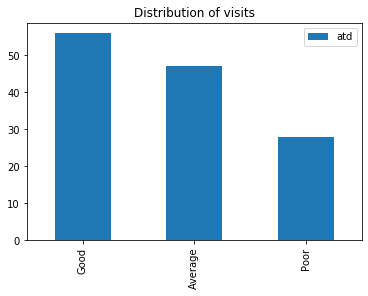

In [4]:
df['atd'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Distribution of visits');

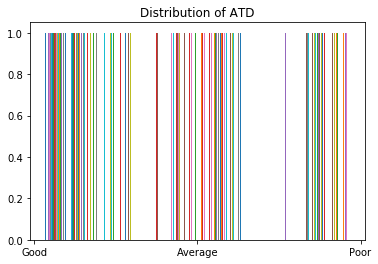

In [5]:
#проверим на сбалансированность
plt.hist(df.loc[:,'atd'], bins = 3)
plt.title('Distribution of ATD');

In [7]:
print(data.shape)
data.columns

(131, 22)


Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ms', 'ls', 'as', 'fmi',
       'fs', 'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')

In [8]:
data =data.drop(['ms'], axis=1) # all are Unmarried
data.head()

,ge,cst,tnp,twp,iap,esp,arr,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,V,Paid,Medium,Average,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,V,Paid,Low,Average,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,V,Paid,Am,Average,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,V,Paid,Medium,Small,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,V,Paid,Am,Average,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [9]:
#df = df.replace({'Voice mail plan': d})
#d = {'M': 'm', 'F': 'w'} # ge - gender and F is woman 
#data['ge'] = data['ge'].map(d)
#data
df['atd'].value_counts()

Good       56
Average    47
Poor       28
Name: atd, dtype: int64

In [10]:
#y
percentile = {'Good': int(3), 'Average': int(2), 'Poor':int(1)}
y = data['atd'].map(percentile)
data = data.drop(['atd'], axis=1)
print(y, '\n', data)

0      3
1      2
2      3
3      2
4      3
      ..
126    1
127    2
128    3
129    2
130    2
Name: atd, Length: 131, dtype: int64 
     ge   cst   tnp   twp   iap   esp arr ls    as     fmi       fs  fq  mq  \
0    F     G  Good  Good    Vg  Good   Y  V  Paid  Medium  Average  Um  10   
1    M   OBC    Vg    Vg    Vg    Vg   N  V  Paid     Low  Average  Um  Il   
2    F   OBC  Good  Good    Vg  Good   N  V  Paid      Am  Average  12  10   
3    M  MOBC  Pass  Good    Vg  Good   N  V  Paid  Medium    Small  12  Um   
4    M     G  Good  Good    Vg    Vg   N  V  Paid      Am  Average  10  12   
..  ..   ...   ...   ...   ...   ...  .. ..   ...     ...      ...  ..  ..   
126  M     G  Pass  Good  Good  Pass   Y  T  Free     Low    Small  Um  Il   
127  M  MOBC    Vg    Vg  Good  Good   N  V  Free    High    Small  10  Um   
128  F   OBC  Good  Good    Vg  Good   N  V  Free      Am    Large  Il  Il   
129  M    ST  Pass  Pass  Good  Pass   Y  V  Free     Low  Average  Um  Um   
130 

In [11]:
percentile_value = {'Best': int(5), 'Vg': int(4), 'Good': int(3), 'Pass': int(2), 'Fail':int(1)}
print(percentile_value)
# числовые признаки
col_value = df.loc[:,['tnp','twp','iap','esp']]

col_value['tnp'] = col_value['tnp'].map(percentile_value)
col_value['twp'] = col_value['twp'].map(percentile_value)
col_value['iap'] = col_value['iap'].map(percentile_value)
col_value['esp'] = col_value['esp'].map(percentile_value)
col_value
data = data.drop(['tnp','twp','iap','esp'], axis = 1)

{'Best': 5, 'Vg': 4, 'Good': 3, 'Pass': 2, 'Fail': 1}


In [12]:
for _c in data.select_dtypes(include=['object']).columns:
  #  print(_c)
    data[_c]  = pd.Categorical(data[_c])
data_transformed = pd.get_dummies(data, drop_first=True)#
data_transformed.astype(int)

,ge_M,cst_MOBC,cst_OBC,cst_SC,cst_ST,arr_Y,ls_V,as_Paid,fmi_High,fmi_Low,fmi_Medium,fmi_Vh,fs_Large,fs_Small,fq_12,fq_Degree,fq_Il,fq_Pg,fq_Um,mq_12,mq_Degree,mq_Il,mq_Pg,mq_Um,fo_Farmer,fo_Others,fo_Retired,fo_Service,mo_Housewife,mo_Others,mo_Retired,mo_Service,nf_Large,nf_Small,sh_Good,sh_Poor,ss_Private,me_Ben,me_Eng,me_Hin,tt_Large,tt_Small
0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
127,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
128,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
129,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
data_transformed.columns

Index(['ge_M', 'cst_MOBC', 'cst_OBC', 'cst_SC', 'cst_ST', 'arr_Y', 'ls_V',
       'as_Paid', 'fmi_High', 'fmi_Low', 'fmi_Medium', 'fmi_Vh', 'fs_Large',
       'fs_Small', 'fq_12', 'fq_Degree', 'fq_Il', 'fq_Pg', 'fq_Um', 'mq_12',
       'mq_Degree', 'mq_Il', 'mq_Pg', 'mq_Um', 'fo_Farmer', 'fo_Others',
       'fo_Retired', 'fo_Service', 'mo_Housewife', 'mo_Others', 'mo_Retired',
       'mo_Service', 'nf_Large', 'nf_Small', 'sh_Good', 'sh_Poor',
       'ss_Private', 'me_Ben', 'me_Eng', 'me_Hin', 'tt_Large', 'tt_Small'],
      dtype='object')

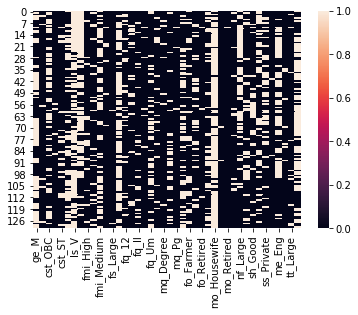

In [14]:
sns.heatmap(data_transformed.iloc[:,:]);

In [15]:
data_transformed = data_transformed.drop(['mo_Housewife'], axis = 1)#дуже корелює

In [16]:
data_transformed = pd.concat([data_transformed, col_value], axis = 1, sort = 'feature_names')
data_transformed

,ge_M,cst_MOBC,cst_OBC,cst_SC,cst_ST,arr_Y,ls_V,as_Paid,fmi_High,fmi_Low,fmi_Medium,fmi_Vh,fs_Large,fs_Small,fq_12,fq_Degree,fq_Il,fq_Pg,fq_Um,mq_12,mq_Degree,mq_Il,mq_Pg,mq_Um,fo_Farmer,fo_Others,fo_Retired,fo_Service,mo_Others,mo_Retired,mo_Service,nf_Large,nf_Small,sh_Good,sh_Poor,ss_Private,me_Ben,me_Eng,me_Hin,tt_Large,tt_Small,tnp,twp,iap,esp
0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3,3,4,3
1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,4,4,4,4
2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,4,3
3,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,3,4,3
4,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,2,3,3,2
127,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4,4,3,3
128,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3,3,4,3
129,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,3,2


In [17]:
print(data_transformed.columns)
data_transformed.astype(int)

Index(['ge_M', 'cst_MOBC', 'cst_OBC', 'cst_SC', 'cst_ST', 'arr_Y', 'ls_V',
       'as_Paid', 'fmi_High', 'fmi_Low', 'fmi_Medium', 'fmi_Vh', 'fs_Large',
       'fs_Small', 'fq_12', 'fq_Degree', 'fq_Il', 'fq_Pg', 'fq_Um', 'mq_12',
       'mq_Degree', 'mq_Il', 'mq_Pg', 'mq_Um', 'fo_Farmer', 'fo_Others',
       'fo_Retired', 'fo_Service', 'mo_Others', 'mo_Retired', 'mo_Service',
       'nf_Large', 'nf_Small', 'sh_Good', 'sh_Poor', 'ss_Private', 'me_Ben',
       'me_Eng', 'me_Hin', 'tt_Large', 'tt_Small', 'tnp', 'twp', 'iap', 'esp'],
      dtype='object')


,ge_M,cst_MOBC,cst_OBC,cst_SC,cst_ST,arr_Y,ls_V,as_Paid,fmi_High,fmi_Low,fmi_Medium,fmi_Vh,fs_Large,fs_Small,fq_12,fq_Degree,fq_Il,fq_Pg,fq_Um,mq_12,mq_Degree,mq_Il,mq_Pg,mq_Um,fo_Farmer,fo_Others,fo_Retired,fo_Service,mo_Others,mo_Retired,mo_Service,nf_Large,nf_Small,sh_Good,sh_Poor,ss_Private,me_Ben,me_Eng,me_Hin,tt_Large,tt_Small,tnp,twp,iap,esp
0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3,3,4,3
1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,4,4,4,4
2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,4,3
3,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,3,4,3
4,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,2,3,3,2
127,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4,4,3,3
128,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3,3,4,3
129,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,3,2


In [18]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 45 columns):
ge_M          131 non-null uint8
cst_MOBC      131 non-null uint8
cst_OBC       131 non-null uint8
cst_SC        131 non-null uint8
cst_ST        131 non-null uint8
arr_Y         131 non-null uint8
ls_V          131 non-null uint8
as_Paid       131 non-null uint8
fmi_High      131 non-null uint8
fmi_Low       131 non-null uint8
fmi_Medium    131 non-null uint8
fmi_Vh        131 non-null uint8
fs_Large      131 non-null uint8
fs_Small      131 non-null uint8
fq_12         131 non-null uint8
fq_Degree     131 non-null uint8
fq_Il         131 non-null uint8
fq_Pg         131 non-null uint8
fq_Um         131 non-null uint8
mq_12         131 non-null uint8
mq_Degree     131 non-null uint8
mq_Il         131 non-null uint8
mq_Pg         131 non-null uint8
mq_Um         131 non-null uint8
fo_Farmer     131 non-null uint8
fo_Others     131 non-null uint8
fo_Retired    131 non-null uint8
fo_S

## RandomForestClassifier

In [19]:
x = data_transformed.iloc[:, :].values
#print(x, '\n\n', y)
# разбить на обучающую выборку и тестовую можно функцией
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((91, 45), (40, 45), (91,), (40,))

In [20]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
print('score=', clf_rf.score(x_train, y_train))
print("predict=", (clf_rf.predict(x_test == 1)))

score= 0.967032967032967
predict= [1 1 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1
 2 1 1]


#### Cross validation

In [22]:
#from sklearn.metrics  import accuracy_score
# разбиваем на два подмножества / фолда, параметр cv и получаем точность для каждого
scores = cross_val_score(clf_rf, x_train, y_train, cv=2)
print(scores.mean())  
#accuracy_score(y_test, y_train)#    (y_test, y_train)

0.42940038684719534


#### GridSearch

In [23]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 15, 20, 50, 100],
            'n_estimators': [10] }

In [24]:
clf = RandomForestClassifier()
grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)

In [25]:
grid_searcher.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=15, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, n_estimators=10 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . criterion=entropy, max_depth=15, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=15, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=50, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=50, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=50, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=50, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=50, n_estimators=10 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished
C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [26]:
clf_best = grid_searcher.best_estimator_

In [27]:
print('Best params = ', clf_best.get_params())

Best params =  {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [28]:
grid_searcher.best_score_

0.4945054945054945

## new     y = atd_transformed 

atd_transformed = pd.get_dummies(pd.Categorical(df['atd']))#, drop_first=True)
#atd_transformed = pd.get_dummies(pd.Categorical(y = df['atd']), drop_first=True)#

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, atd_transformed, test_size=0.3, random_state=42)

clf_rf1 = RandomForestClassifier()
clf_rf1.fit(x_train1, y_train1)

scores1 = cross_val_score(clf_rf1, x_train1, y_train1, cv=17)
print(scores1.mean())   #0.26666666666666666

grid_searcher_1 = GridSearchCV(clf_rf1, parameter_grid, verbose=2)
grid_searcher_1.fit(x_train1, y_train1)

clf_best1 = grid_searcher_1.best_estimator_
clf_best1

grid_searcher_1.best_score_ #0.5494505494505495

 Іf y=Categorical then score is worse

# Сохранение и загрузка моделей

In [29]:
from sklearn.externals import joblib

# предполагаем что clf - обучен выше
path_to_pkl = os.path.join(os.getcwd(), 'rf_classifier.model')
joblib.dump(clf, path_to_pkl, compress=1)
clf_rf = joblib.load(path_to_pkl)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
# График важности параметров

In [31]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 100],
            'n_estimators': [10, 20, 100]
        }
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
importances = clf_rf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

[0.04759251 0.01787292 0.02249175 0.00157186 0.02167296 0.02291263
 0.02896999 0.02740614 0.02319658 0.00692329 0.02466396 0.0127724
 0.         0.05850236 0.01533696 0.03538761 0.008571   0.00316953
 0.04164272 0.00416531 0.00787986 0.02697686 0.         0.02290443
 0.01520139 0.01419883 0.00354835 0.02425239 0.01466579 0.
 0.01378233 0.03906786 0.03256553 0.00923467 0.02943532 0.02001166
 0.         0.0111786  0.01865977 0.01439087 0.01107752 0.07890716
 0.0635844  0.05385    0.04980393]


In [33]:

print( len(importances))

45


In [34]:
np.argsort

<function numpy.argsort(a, axis=-1, kind='quicksort', order=None)>

In [35]:
indices = np.argsort(importances)[::-1]
names_indices = indices 
indices

array([41, 42, 13, 43, 44,  0, 18, 31, 15, 32, 34,  6,  7, 21, 10, 27,  8,
        5, 23,  2,  4, 35, 38,  1, 14, 24, 28, 39, 25, 30, 11, 37, 40, 33,
       16, 20,  9, 19, 26, 17,  3, 12, 29, 36, 22], dtype=int64)

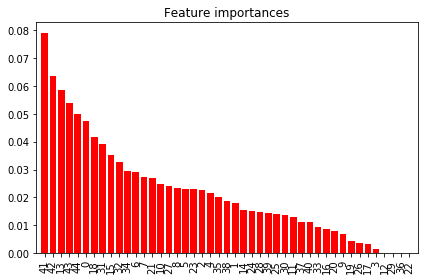

In [36]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
 
plt.bar(range(len(importances)), importances[indices], color="r")
plt.xticks(range(len(importances)), names_indices, rotation=90)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()

In [37]:
importances

array([0.04759251, 0.01787292, 0.02249175, 0.00157186, 0.02167296,
       0.02291263, 0.02896999, 0.02740614, 0.02319658, 0.00692329,
       0.02466396, 0.0127724 , 0.        , 0.05850236, 0.01533696,
       0.03538761, 0.008571  , 0.00316953, 0.04164272, 0.00416531,
       0.00787986, 0.02697686, 0.        , 0.02290443, 0.01520139,
       0.01419883, 0.00354835, 0.02425239, 0.01466579, 0.        ,
       0.01378233, 0.03906786, 0.03256553, 0.00923467, 0.02943532,
       0.02001166, 0.        , 0.0111786 , 0.01865977, 0.01439087,
       0.01107752, 0.07890716, 0.0635844 , 0.05385   , 0.04980393])

## new x.shape = (131, 17)

In [38]:
x.shape

(131, 45)

In [39]:
X = np.delete(x, [30, 40, 25, 24,  4, 10, 37,  9, 35,  8, 33, 31, 18, 15, 38,  1, 19,
       39, 11, 28, 26, 17, 12, 20, 36, 29,  3, 22], axis = 1)
#X = np.delete(x, np.s_[::20], axis = 1)

In [40]:
X.shape

(131, 17)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((91, 17), (40, 17), (91,), (40,))

In [42]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
scores = cross_val_score(clf_rf, x_train, y_train, cv=2)
print(scores.mean())  
#accuracy_score(y_test, y_train)#    (y_test, y_train)

0.472678916827853


In [44]:
grid_searcher = GridSearchCV(clf_rf, parameter_grid, verbose=2)
grid_searcher.fit(x_train, y_train)

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=10 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=20 ................
[CV] . criterion=entropy, max_depth=10, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.8s finished
C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [45]:
grid_searcher.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
grid_searcher.best_score_

0.5384615384615384